# Convolutional Neural Networks

## Lecture 10

### GRA 4160
### Predictive modelling with machine learning

#### Lecturer: Vegard H. Larsen

## CIFAR-100 dataset

A widely-used benchmark for evaluating machine learning algorithms, particularly in the domain of image classification.
It is an extension of the CIFAR-10 dataset, which contains 60,000 32x32-pixel color images, divided into 10 classes with 6,000 images per class.

The CIFAR-100 dataset expands upon CIFAR-10 by incorporating 100 fine-grained classes, with each class containing 600 images.
These 100 classes are further grouped into 20 coarse-grained classes, each containing 5 fine-grained classes.
The dataset is divided into 50,000 training images and 10,000 testing images, with each fine-grained class represented by 500 training images and 100 testing images.

The images in the CIFAR-100 dataset are small, low-resolution, and challenging to classify, making it a suitable benchmark for evaluating the performance of various machine learning algorithms and deep learning architectures.
Researchers often use this dataset to compare different model architectures, training techniques, and hyperparameter configurations to advance the state of the art in image classification.

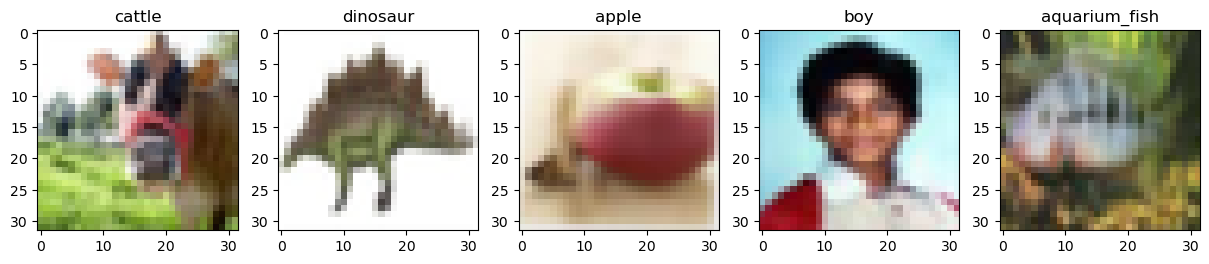

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-100 dataset
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data(label_mode='fine')

# Define the fine-grained class names (100 classes)
fine_label_list = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck',
    'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel',
    'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

# Preprocess the data
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_labels = to_categorical(train_labels, num_classes=100)
test_labels = to_categorical(test_labels, num_classes=100)

# Display a few example images with their labels
num_images = 5
plt.figure(figsize=(15, 3))

for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(train_images[i], interpolation='nearest')
    plt.title(fine_label_list[np.argmax(train_labels[i])])

plt.show()

## Conv2d

A fundamental building block for many deep learning models, particularly in the domain of image processing and computer vision.
The 2D convolutional layer applies a set of learnable filters (also called kernels) to the input, performing a convolution operation to extract local features from the input image or feature map.

Each filter in the layer slides over the input, taking a dot product between the filter's weights and the corresponding region of the input.
This operation results in a feature map that captures spatial information and local patterns, such as edges, textures, and shapes.
As the network becomes deeper, these local patterns can be combined to represent more complex and abstract features.

When defining a Conv2D layer in Keras, you need to specify several parameters, such as:

1. filters: The number of filters (kernels) in the convolutional layer. This determines the number of feature maps produced by the layer.
2. kernel_size: The height and width of the filters. Common choices include (3, 3) and (5, 5).
3. strides: The step size used when sliding the filter across the input. A stride of (1, 1) means the filter moves one pixel at a time, while a stride of (2, 2) means it moves two pixels at a time. Larger strides result in smaller feature maps.
4. padding: The method used to handle boundaries when applying the filter. Two common options are 'valid' (no padding) and 'same' (padding the input to maintain the same spatial dimensions).
5. activation: The activation function applied element-wise to the output feature maps. Common choices include 'relu' (Rectified Linear Unit) and 'tanh' (Hyperbolic Tangent).

## Batch normalization

Batch normalization is a technique used in deep learning to improve the training process of neural networks.

The main idea behind batch normalization is to normalize the activations of each layer in the network so that they have a consistent mean and variance.
This is achieved by calculating the mean and variance for each feature across a mini-batch of training examples and then normalizing the activations using these statistics.

Batch normalization has several benefits:

- **Faster convergence**: By normalizing the inputs to each layer, the gradients become more stable and the optimization process converges more quickly.
- **Higher learning rates**: Because the gradients are more stable, higher learning rates can be used without causing the optimization process to diverge or overshoot the optimal solution.
- **Regularization effect**: Batch normalization adds a slight noise to the activations, which can have a regularization effect, reducing the risk of overfitting.
- **Reduced sensitivity to weight initialization**: With batch normalization, the network becomes less sensitive to the initial values of the weights, allowing for a wider range of weight initialization strategies.

In practice, batch normalization is typically applied after the convolutional or fully connected layers in a neural network and before the activation function (e.g., ReLU). However, it's worth noting that there is an ongoing debate about the optimal placement of batch normalization layers in a network architecture.


## Padding

Padding refers to the process of adding extra pixels or values around the input image or feature map before applying the convolution operation.
Padding is used to control the spatial dimensions of the output feature maps and to preserve the spatial resolution of the input through the network layers.

There are two common padding strategies used in CNNs:

- "same" padding: As mentioned above, this padding strategy ensures that the output feature map has the same spatial dimensions as the input feature map.
- "valid" padding: This strategy does not add any padding to the input feature map. As a result, the spatial dimensions of the output feature map will be smaller than those of the input feature map, depending on the kernel size and stride used in the convolution operation.

The choice of padding strategy depends on the specific requirements of the task and the desired properties of the network architecture.

In [10]:
# Load and preprocess the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

In [11]:
# Define the CNN model
# Import the required libraries
from tensorflow.keras import models, layers

# Create a Sequential model
model = models.Sequential()

# First block: two Conv2D layers with 32 filters, followed by Batch Normalization, MaxPooling2D
# The padding="same" parameter in the CNN code means that the padding is applied such that the output feature map has the same spatial dimensions (width and height) as the input feature map.
model.add(layers.Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(32, 32, 3))) # 32 filters, (3, 3) kernel size, ReLU activation, and input shape of (32, 32, 3)
model.add(layers.BatchNormalization()) # Normalize the activations of the previous layer
model.add(layers.Conv2D(32, (3, 3), activation="relu", padding="same")) # 32 filters, (3, 3) kernel size, ReLU activation
model.add(layers.BatchNormalization()) # Normalize the activations of the previous layer
model.add(layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling with pool size (2, 2)
model.add(layers.Dropout(0.3)) # Dropout layer with dropout rate of 0.3

# Second block: two Conv2D layers with 64 filters, followed by Batch Normalization, MaxPooling2D, and Dropout
model.add(layers.Conv2D(64, (3, 3), activation="relu", padding="same")) # 64 filters, (3, 3) kernel size, ReLU activation
model.add(layers.BatchNormalization()) # Normalize the activations of the previous layer
model.add(layers.Conv2D(64, (3, 3), activation="relu", padding="same")) # 64 filters, (3, 3) kernel size, ReLU activation
model.add(layers.BatchNormalization()) # Normalize the activations of the previous layer
model.add(layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling with pool size (2, 2)
model.add(layers.Dropout(0.5)) # Dropout layer with dropout rate of 0.5

# Third block: two Conv2D layers with 128 filters, followed by Batch Normalization, MaxPooling2D, and Dropout
model.add(layers.Conv2D(128, (3, 3), activation="relu", padding="same")) # 128 filters, (3, 3) kernel size, ReLU activation
model.add(layers.BatchNormalization()) # Normalize the activations of the previous layer
model.add(layers.Conv2D(128, (3, 3), activation="relu", padding="same")) # 128 filters, (3, 3) kernel size, ReLU activation
model.add(layers.BatchNormalization()) # Normalize the activations of the previous layer
model.add(layers.MaxPooling2D(pool_size=(2, 2))) # Max pooling with pool size (2, 2)
model.add(layers.Dropout(0.5)) # Dropout layer with dropout rate of 0.5

# Flatten the output of the previous block
model.add(layers.Flatten())

# Fully connected layer with 128 nodes and ReLU activation
model.add(layers.Dense(128, activation="relu"))

# Batch Normalization layer
model.add(layers.BatchNormalization())

# Dropout layer with dropout rate of 0.5
model.add(layers.Dropout(0.5))

# Output layer: fully connected layer with 100 nodes and Softmax activation
model.add(layers.Dense(100, activation="softmax"))

In [12]:
# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

Epoch 1/100
625/625 [==============================] - 51s 82ms/step - loss: 4.2643 - accuracy: 0.0746 - val_loss: 3.8617 - val_accuracy: 0.1075
Epoch 2/100
625/625 [==============================] - 52s 83ms/step - loss: 3.5634 - accuracy: 0.1542 - val_loss: 3.2543 - val_accuracy: 0.2206
Epoch 3/100
625/625 [==============================] - 51s 81ms/step - loss: 3.1953 - accuracy: 0.2166 - val_loss: 2.9699 - val_accuracy: 0.2641
Epoch 4/100
625/625 [==============================] - 51s 82ms/step - loss: 2.9160 - accuracy: 0.2619 - val_loss: 2.7109 - val_accuracy: 0.3053
Epoch 5/100
625/625 [==============================] - 50s 80ms/step - loss: 2.7341 - accuracy: 0.3018 - val_loss: 2.3909 - val_accuracy: 0.3734
Epoch 6/100
625/625 [==============================] - 49s 79ms/step - loss: 2.5974 - accuracy: 0.3288 - val_loss: 2.2882 - val_accuracy: 0.3954
Epoch 7/100
625/625 [==============================] - 51s 82ms/step - loss: 2.4964 - accuracy: 0.3478 - val_loss: 2.2049 - val_ac